<a href="https://colab.research.google.com/github/parthdt/B.Tech-Codes/blob/master/Machine%20Learning/Final%20Assignment/CSP774_Final_Assignment_Parth_Thakker_2017UCS0047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting the data and performing LBP Feature Extraction

**First, I extract the dataset and perform initial analysis.
Then, I perform LBP Feature extraction on the dataset.**

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')
!unzip -q drive/MyDrive/malimg_dataset.zip

Mounted at /content/drive/


## Extracting Data

In [ ]:
!ls malimg_paper_dataset_imgs/

 Adialer.C	  C2LOP.P	   Lolyda.AA3		      'Swizzor.gen!E'
 Agent.FYI	  Dialplatform.B   Lolyda.AT		      'Swizzor.gen!I'
 Allaple.A	  Dontovo.A	  'Malex.gen!J'		       VB.AT
 Allaple.L	  Fakerean	   malimg_dataset_readme.txt   Wintrim.BX
'Alueron.gen!J'   Instantaccess    Obfuscator.AD	       Yuner.A
 Autorun.K	  Lolyda.AA1	  'Rbot!gen'
'C2LOP.gen!g'	  Lolyda.AA2	   Skintrim.N


In [ ]:
!cat malimg_paper_dataset_imgs/malimg_dataset_readme.txt

The dataset contains the images of malware family names as mentioned in Tab.3 of the paper "Malware Images: Visualization and Automatic Classification" (http://dl.acm.org/citation.cfm?id=2016908)
If this dataset is used, the above paper must be cited.
This dataset is not be distributed.
Any questions, contact lakshmanan_nataraj@umail.ucsb.edu
Oct. 2013

In [ ]:
!rm malimg_paper_dataset_imgs/malimg_dataset_readme.txt

In [ ]:
!ls malimg_paper_dataset_imgs/

 Adialer.C	  C2LOP.P	   Lolyda.AA3	   'Swizzor.gen!I'
 Agent.FYI	  Dialplatform.B   Lolyda.AT	    VB.AT
 Allaple.A	  Dontovo.A	  'Malex.gen!J'     Wintrim.BX
 Allaple.L	  Fakerean	   Obfuscator.AD    Yuner.A
'Alueron.gen!J'   Instantaccess   'Rbot!gen'
 Autorun.K	  Lolyda.AA1	   Skintrim.N
'C2LOP.gen!g'	  Lolyda.AA2	  'Swizzor.gen!E'


## LBP Feature Extraction

In [ ]:
import os
import pandas as pd
import numpy as np
from skimage.feature import local_binary_pattern
import glob
from PIL import Image
from time import time

In [ ]:
!ls

drive  malimg_paper_dataset_imgs  sample_data


In [ ]:
len(os.listdir(os.getcwd() + '/malimg_paper_dataset_imgs'))   #No. of malware families

25

In [ ]:
#checking if images are grayscale/RGB, basically checks R=G=B for each image
def isGreyscale(img_path):
    img = Image.open(img_path).convert('RGB')
    w,h = img.size
    for i in range(w):
        for j in range(h):
            r,g,b = img.getpixel((i,j))
            if r != g != b: return False
    return True

print(isGreyscale('/content/malimg_paper_dataset_imgs/VB.AT/00016fea77362103e72eec6198da7ba2.png'))     #on a random image, assuming all images are similar

True


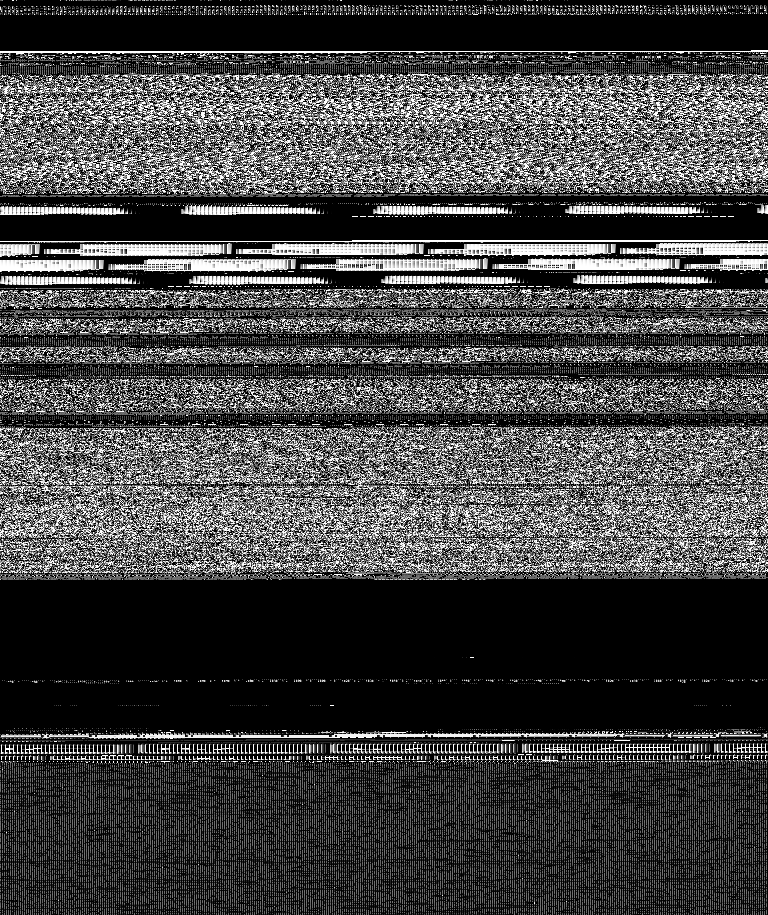

In [ ]:
image = Image.open('/content/malimg_paper_dataset_imgs/VB.AT/00016fea77362103e72eec6198da7ba2.png')
image

In [ ]:
image.size

(768, 915)

In [ ]:
lbp = local_binary_pattern(image, 8, 1, 'uniform')
print("LBP = \n", lbp)

LBP = 
 [[1. 1. 0. ... 8. 8. 8.]
 [8. 8. 8. ... 8. 8. 8.]
 [8. 8. 8. ... 8. 8. 8.]
 ...
 [0. 8. 0. ... 8. 9. 8.]
 [1. 8. 9. ... 8. 0. 8.]
 [1. 8. 0. ... 8. 1. 8.]]


In [ ]:
n_bins = int(lbp.max() + 1)
print("Bins in histogram =", n_bins)
hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
print(hist)

Bins in histogram = 10
[0.08571835 0.10406421 0.01839709 0.02530168 0.01633225 0.02610001
 0.01803279 0.04497666 0.50512153 0.15595543]


In [ ]:
#lbp params
radius = 1      #3*3 GRID, circle of radius 3
n_points = 8    #The points except the center point is considered, so 8
METHOD = 'uniform'

malwareFamilyCount = 0      #label for each malware family
malwareData = []

absPath = os.getcwd() + '/malimg_paper_dataset_imgs'    #get abs path of dataset

for malware_family in os.listdir(absPath):

    # print(malware_family)

    absPathFiles = absPath + '/' + malware_family
    malwareFamilyCount+=1   # For each folder, represent it as a number, so 1->25

    for image in os.listdir(absPathFiles):
        tempImage = Image.open(absPathFiles + '/' + image)
        lbp = local_binary_pattern(tempImage, n_points, radius, METHOD)
        n_bins = int(lbp.max() + 1)
        hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
        malwareData.append( [malwareFamilyCount] + list(hist) )

In [ ]:
malwareData = pd.DataFrame(malwareData)
malwareData

,0,1,2,3,4,5,6,7,8,9,10
0,1,0.159143,0.110014,0.036888,0.028302,0.022148,0.029328,0.036858,0.101949,0.246481,0.228890
1,1,0.159677,0.109412,0.036729,0.028326,0.022264,0.029352,0.036667,0.101863,0.246751,0.228958
2,1,0.159696,0.109289,0.036704,0.028351,0.021914,0.029168,0.036839,0.101980,0.246904,0.229154
3,1,0.159560,0.109658,0.036974,0.028326,0.021853,0.029254,0.036796,0.101507,0.247230,0.228841
4,1,0.159579,0.109682,0.036870,0.028363,0.021773,0.029334,0.036827,0.101796,0.246960,0.228817
...,...,...,...,...,...,...,...,...,...,...,...
9334,25,0.151765,0.116392,0.035229,0.026186,0.022786,0.032841,0.032480,0.094329,0.281395,0.206597
9335,25,0.148655,0.118996,0.036386,0.025391,0.023872,0.033420,0.033999,0.093895,0.281105,0.204282
9336,25,0.150969,0.117549,0.035012,0.026403,0.023293,0.033275,0.032769,0.094546,0.280816,0.205367
9337,25,0.150897,0.117043,0.035735,0.025825,0.023003,0.032769,0.032480,0.095124,0.281395,0.205729


In [ ]:
malwareData.columns = ['Malware Family'] + list(range(10))    #Rename First column name
malwareData

,Malware Family,0,1,2,3,4,5,6,7,8,9
0,1,0.159143,0.110014,0.036888,0.028302,0.022148,0.029328,0.036858,0.101949,0.246481,0.228890
1,1,0.159677,0.109412,0.036729,0.028326,0.022264,0.029352,0.036667,0.101863,0.246751,0.228958
2,1,0.159696,0.109289,0.036704,0.028351,0.021914,0.029168,0.036839,0.101980,0.246904,0.229154
3,1,0.159560,0.109658,0.036974,0.028326,0.021853,0.029254,0.036796,0.101507,0.247230,0.228841
4,1,0.159579,0.109682,0.036870,0.028363,0.021773,0.029334,0.036827,0.101796,0.246960,0.228817
...,...,...,...,...,...,...,...,...,...,...,...
9334,25,0.151765,0.116392,0.035229,0.026186,0.022786,0.032841,0.032480,0.094329,0.281395,0.206597
9335,25,0.148655,0.118996,0.036386,0.025391,0.023872,0.033420,0.033999,0.093895,0.281105,0.204282
9336,25,0.150969,0.117549,0.035012,0.026403,0.023293,0.033275,0.032769,0.094546,0.280816,0.205367
9337,25,0.150897,0.117043,0.035735,0.025825,0.023003,0.032769,0.032480,0.095124,0.281395,0.205729


In [ ]:
malwareData.isnull().values.any() #To find if there is NaN values

False

# Creating Machine Learning Models learned in the course

**Now that the features are extracted, I split the data into train and test. Since we have to perform training and outputting metrics of multiple models, I define a function that does that, to prevent redundancy of code. I have trained multiple ML models on this data.**

## Splitting the data, train and test

In [ ]:
X = malwareData[list(range(0,10))]
X

,0,1,2,3,4,5,6,7,8,9
0,0.014989,0.020236,0.004030,0.005119,0.002962,0.010626,0.004935,0.012343,0.896520,0.028240
1,0.014404,0.019442,0.003738,0.005282,0.003431,0.012043,0.004488,0.010902,0.899831,0.026438
2,0.014099,0.018347,0.003975,0.004712,0.002840,0.011560,0.004370,0.010417,0.904289,0.025391
3,0.013367,0.015816,0.003459,0.004354,0.003153,0.010917,0.003923,0.009814,0.912553,0.022644
4,0.013025,0.016366,0.003471,0.004366,0.002885,0.010075,0.004224,0.010193,0.912813,0.022583
...,...,...,...,...,...,...,...,...,...,...
9334,0.150502,0.115258,0.034807,0.030014,0.022669,0.029909,0.033459,0.093834,0.277790,0.211757
9335,0.159944,0.120271,0.038589,0.030281,0.024604,0.030002,0.037545,0.104298,0.221366,0.233100
9336,0.152020,0.119689,0.037285,0.033123,0.023070,0.030398,0.035211,0.096784,0.245881,0.226538
9337,0.146583,0.114279,0.035922,0.031214,0.026328,0.030712,0.035167,0.092329,0.276640,0.210826


In [ ]:
Y = malwareData['Malware Family']
Y

0        1
1        1
2        1
3        1
4        1
        ..
9334    25
9335    25
9336    25
9337    25
9338    25
Name: Malware Family, Length: 9339, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split

#split the data into train and test
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.25)

In [ ]:
#Find shapes of each array
print(XTrain.shape, XTest.shape, YTrain.shape, YTest.shape)

(7004, 10) (2335, 10) (7004,) (2335,)


## Training the different models

In [ ]:
accuracies, trainTimes, testTimes = [], [], []

In [ ]:
# A function that trains the model and outputs metrics
def trainModel(model,modelName,XTrain,XTest,YTrain,YTest):

    print("Training a {} model.\n".format(modelName))
    
    trainStart = time()
    model.fit(XTrain, YTrain)
    trainEnd = time()
    trainTime = trainEnd - trainStart

    print("{} model trained. Time taken for training is: {} seconds.\n". format(modelName, trainTime))

    testStart = time()
    accuracy = model.score(XTest,YTest)
    testEnd = time()
    testTime = testEnd - testStart

    print("{} model has been tested on the test data.".format(modelName))
    print("Accuracy of this model is:", accuracy)
    print("Time taken for testing is {} seconds.\n".format(testTime))

    YPred = model.predict(XTest)

    print("Classification Report of the Model:")
    print(classification_report(YTest, YPred, labels=np.unique(YPred)))

    # confusionMatrix = confusion_matrix(YTest, YPred, labels=np.unique(YPred))
    # confusionMatrix = confusion_matrix(YTest, YPred)
    # print("Confusion Matrix of the {} model:".format(modelName))
    # pl.matshow(confusionMatrix)
    # pl.colorbar()
    # pl.show()
    
    print("Confusion Matrix:")
    figureSide = min(len(np.unique(YPred)),12)
    fig, ax = plt.subplots(figsize=(figureSide, figureSide))
    plot_confusion_matrix(model, XTest, YTest, ax=ax, labels=np.unique(YPred), values_format = '')
    # plt.figure(figsize=(20,20))
    plt.show()

    return accuracy, trainTime, testTime

Training a Logistic Regression model.

Logistic Regression model trained. Time taken for training is: 2.059643507003784 seconds.

Logistic Regression model has been tested on the test data.
Accuracy of this model is: 0.4638115631691649
Time taken for testing is 0.0034067630767822266 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           3       0.46      1.00      0.63       721
           9       0.41      1.00      0.58       212
          12       0.49      0.99      0.66       100
          20       1.00      0.38      0.55        48

   micro avg       0.46      0.97      0.63      1114
   macro avg       0.67      0.87      0.68      1114
weighted avg       0.49      0.97      0.63      1114

Confusion Matrix:


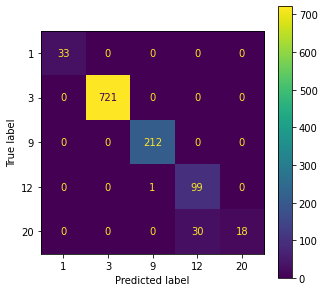

In [ ]:
#Logistic Regression
model = LogisticRegression(max_iter=10000)
accuracy, trainTime, testTime = trainModel(model, "Logistic Regression", XTrain, XTest, YTrain, YTest)
accuracies.append(accuracy)
trainTimes.append(trainTime)
testTimes.append(testTime)

Training a Linear SVM model.

Linear SVM model trained. Time taken for training is: 0.6797657012939453 seconds.

Linear SVM model has been tested on the test data.
Accuracy of this model is: 0.6149892933618843
Time taken for testing is 0.6017630100250244 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       0.46      0.89      0.61        79
           3       0.60      0.97      0.75       721
           9       0.78      1.00      0.88       212
          10       0.98      0.80      0.88        50
          12       0.70      0.97      0.81       100
          15       1.00      0.85      0.92        27
          18       0.50      1.00      0.67       103
          19       0.27      1.00      0.42        47
          20       0.92      1.00      0.96        48
          24       0.76      0.94      0.84        65

   micro avg       0.61      0.97      0.75      

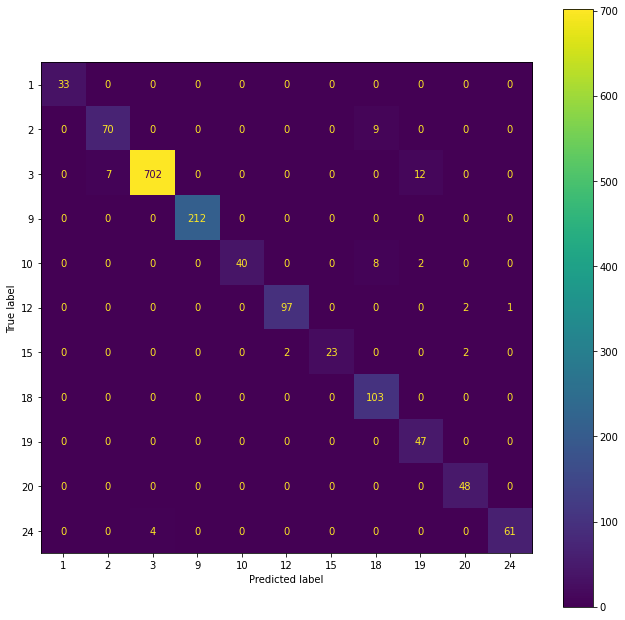

In [ ]:
#Linear SVM Kernel
model = SVC(kernel = 'linear',C=7)
accuracy, trainTime, testTime = trainModel(model, "Linear SVM", XTrain, XTest, YTrain, YTest)
accuracies.append(accuracy)
trainTimes.append(trainTime)
testTimes.append(testTime)

Training a Polynomial SVM model.

Polynomial SVM model trained. Time taken for training is: 0.41315627098083496 seconds.

Polynomial SVM model has been tested on the test data.
Accuracy of this model is: 0.8376873661670236
Time taken for testing is 0.4394803047180176 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        79
           3       0.75      0.89      0.81       721
           4       1.00      0.97      0.99        35
           5       0.97      1.00      0.99        33
           6       0.86      0.86      0.86        29
           8       0.86      0.98      0.92        51
           9       0.90      1.00      0.95       212
          10       0.88      0.84      0.86        50
          11       1.00      1.00      1.00        29
          12       0.99      0.97      0.98       100
          13       0.95      0.96    

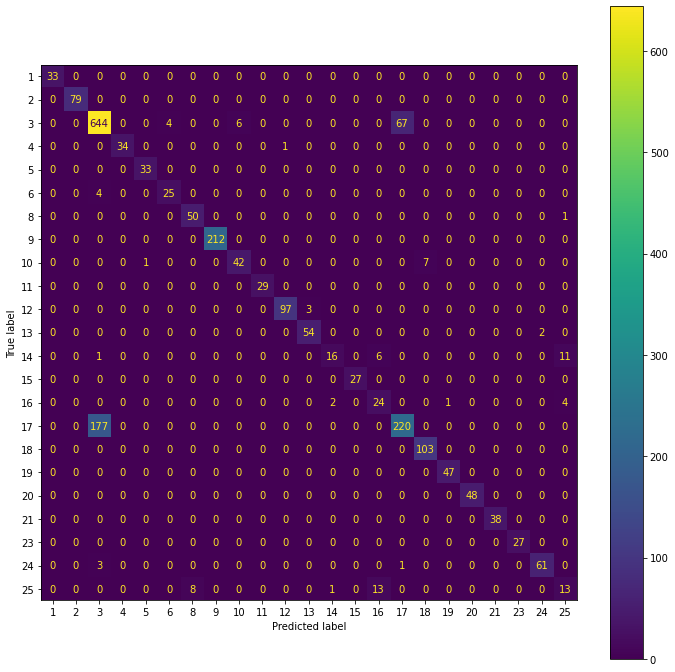

In [ ]:
#Linear SVM Kernel
model = SVC(kernel = 'poly',degree=3,C=7)
accuracy, trainTime, testTime = trainModel(model, "Polynomial SVM", XTrain, XTest, YTrain, YTest)
accuracies.append(accuracy)
trainTimes.append(trainTime)
testTimes.append(testTime)

Training a RBF SVM model.

RBF SVM model trained. Time taken for training is: 0.8025081157684326 seconds.

RBF SVM model has been tested on the test data.
Accuracy of this model is: 0.7460385438972162
Time taken for testing is 0.7188723087310791 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        79
           3       0.61      0.98      0.75       721
           4       1.00      0.94      0.97        35
           5       0.94      1.00      0.97        33
           8       0.86      0.96      0.91        51
           9       0.89      1.00      0.94       212
          10       1.00      0.84      0.91        50
          11       1.00      1.00      1.00        29
          12       0.98      0.97      0.97       100
          13       0.97      0.68      0.80        56
          14       0.69      0.26      0.38        34
     

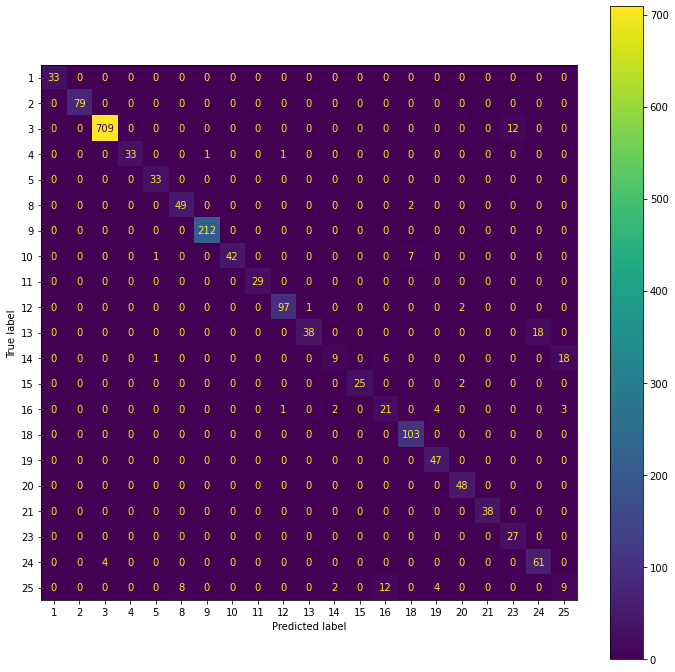

In [ ]:
#RBF SVM Kernel
model = SVC(kernel = 'rbf',C=7)
accuracy, trainTime, testTime = trainModel(model, "RBF SVM", XTrain, XTest, YTrain, YTest)
accuracies.append(accuracy)
trainTimes.append(trainTime)
testTimes.append(testTime)

Training a Naive Bayes model.

Naive Bayes model trained. Time taken for training is: 0.010291099548339844 seconds.

Naive Bayes model has been tested on the test data.
Accuracy of this model is: 0.7614561027837259
Time taken for testing is 0.008214473724365234 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        79
           3       0.88      0.41      0.56       721
           4       1.00      0.97      0.99        35
           5       1.00      1.00      1.00        33
           6       0.90      0.93      0.92        29
           7       1.00      1.00      1.00        24
           8       0.86      0.94      0.90        51
           9       1.00      1.00      1.00       212
          10       0.93      0.84      0.88        50
          11       1.00      1.00      1.00        29
          12       0.97      0.86      0.91

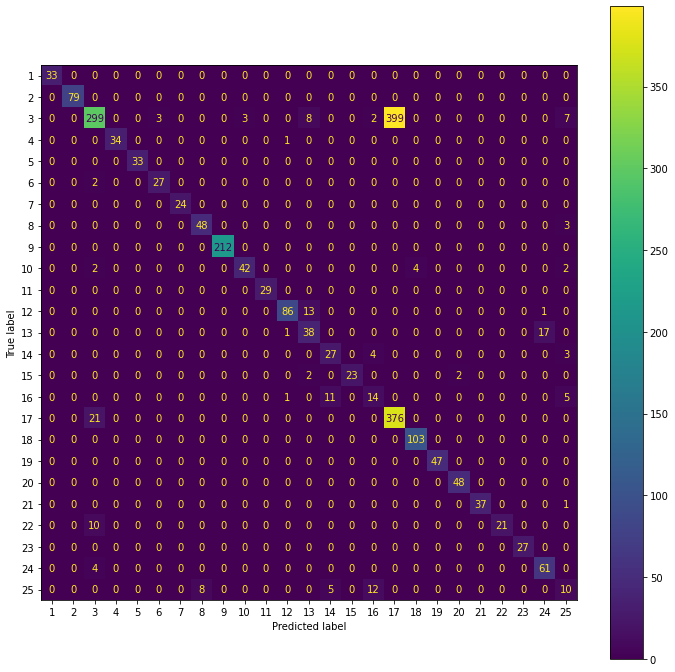

In [ ]:
#Naive Bayes Model
model = GaussianNB()
accuracy, trainTime, testTime = trainModel(model, "Naive Bayes", XTrain, XTest, YTrain, YTest)
accuracies.append(accuracy)
trainTimes.append(trainTime)
testTimes.append(testTime)

Training a Random Forest model.

Random Forest model trained. Time taken for training is: 2.0131776332855225 seconds.

Random Forest model has been tested on the test data.
Accuracy of this model is: 0.9203426124197002
Time taken for testing is 0.0848684310913086 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        79
           3       0.89      0.89      0.89       721
           4       1.00      0.97      0.99        35
           5       1.00      1.00      1.00        33
           6       0.93      0.93      0.93        29
           7       1.00      1.00      1.00        24
           8       0.96      1.00      0.98        51
           9       1.00      1.00      1.00       212
          10       1.00      0.98      0.99        50
          11       1.00      1.00      1.00        29
          12       0.98      0.98      0.

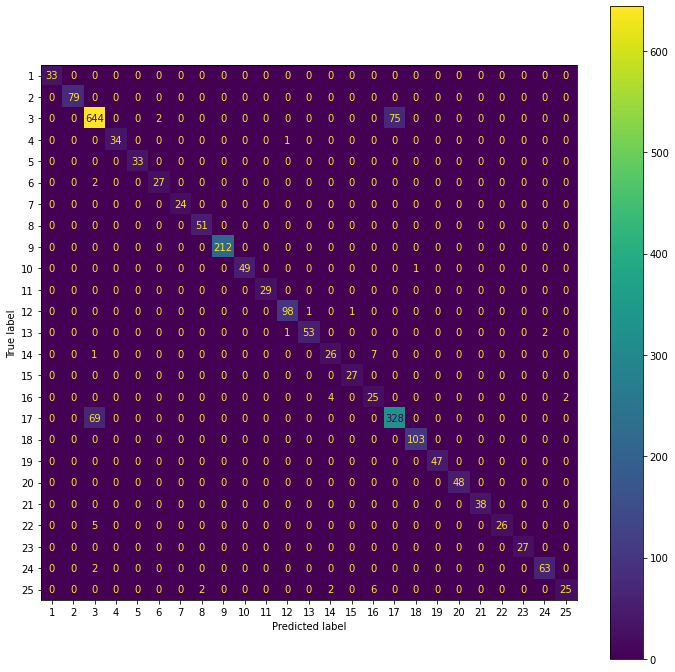

In [ ]:
#Random Forest Model
model = RandomForestClassifier()
accuracy, trainTime, testTime = trainModel(model, "Random Forest", XTrain, XTest, YTrain, YTest)
accuracies.append(accuracy)
trainTimes.append(trainTime)
testTimes.append(testTime)

Training a Decision Tree model.

Decision Tree model trained. Time taken for training is: 0.09741926193237305 seconds.

Decision Tree model has been tested on the test data.
Accuracy of this model is: 0.8942184154175589
Time taken for testing is 0.0024046897888183594 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       0.98      1.00      0.99        79
           3       0.86      0.87      0.86       721
           4       0.97      1.00      0.99        35
           5       1.00      1.00      1.00        33
           6       0.79      0.90      0.84        29
           7       1.00      1.00      1.00        24
           8       0.94      0.96      0.95        51
           9       1.00      1.00      1.00       212
          10       0.98      0.96      0.97        50
          11       1.00      0.97      0.98        29
          12       0.98      0.98    

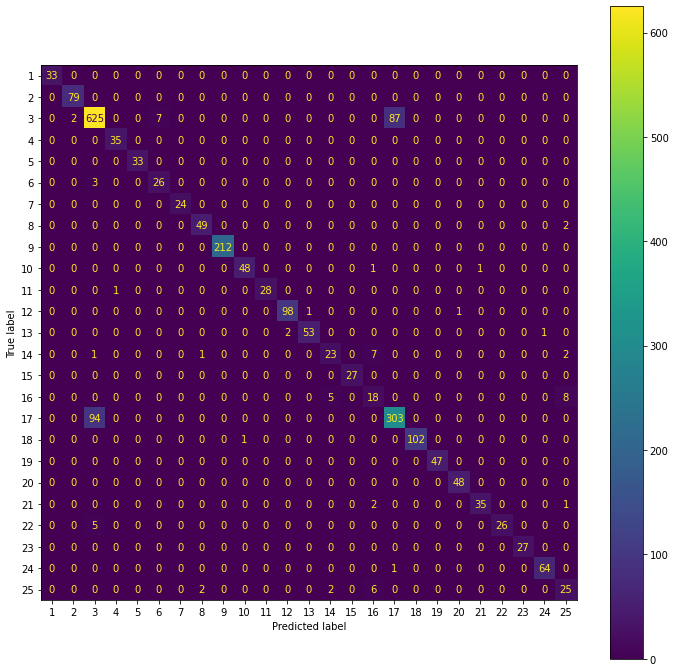

In [ ]:
#Decision Tree Model
model = DecisionTreeClassifier()
accuracy, trainTime, testTime = trainModel(model, "Decision Tree", XTrain, XTest, YTrain, YTest)
accuracies.append(accuracy)
trainTimes.append(trainTime)
testTimes.append(testTime)

# 2D CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, MaxPool2D, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
trainData = image_dataset_from_directory('/content/malimg_paper_dataset_imgs', labels='inferred', label_mode='int', 
color_mode = 'grayscale', image_size = (32,32), validation_split = 0.15, subset = 'training', seed = 42)

validationData = image_dataset_from_directory('/content/malimg_paper_dataset_imgs', labels='inferred', label_mode='int',
color_mode = 'grayscale', image_size = (32,32), validation_split = 0.15, subset = 'validation', seed=42)

Found 9339 files belonging to 25 classes.
Using 7939 files for training.
Found 9339 files belonging to 25 classes.
Using 1400 files for validation.


In [ ]:
# building the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3,activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(25, activation='softmax'))

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dense_1 (Dense)              (None, 25)                3

In [ ]:
model.fit(trainData, validation_data = validationData, epochs = 5)

Epoch 1/5
249/249 [==============================] - 29s 116ms/step - loss: 3.3489 - accuracy: 0.6901 - val_loss: 0.5609 - val_accuracy: 0.8593
Epoch 2/5
249/249 [==============================] - 27s 109ms/step - loss: 0.4005 - accuracy: 0.8960 - val_loss: 0.7211 - val_accuracy: 0.8386
Epoch 3/5
249/249 [==============================] - 27s 110ms/step - loss: 0.3218 - accuracy: 0.9116 - val_loss: 0.4537 - val_accuracy: 0.8879
Epoch 4/5
249/249 [==============================] - 28s 112ms/step - loss: 0.2639 - accuracy: 0.9242 - val_loss: 0.3149 - val_accuracy: 0.9079
Epoch 5/5
249/249 [==============================] - 28s 111ms/step - loss: 0.1863 - accuracy: 0.9414 - val_loss: 0.2561 - val_accuracy: 0.9286


# Comparing Classification Algorithms based on their performance

**Using the metrics obtained earlier, I plot diffent graphs to visualise the performance of these classifiers.**

In [ ]:
models = ['Logistic Regression', 'Linear SVM', 'Polynomial SVM', 'RBF SVM', 'Naive Bayes', 'Random Forest', 'Decision Tree']

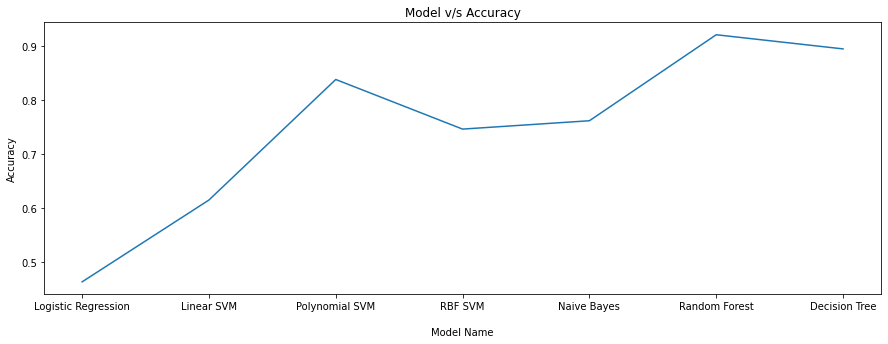

In [ ]:
# Model vs Accuracy
figure = plt.figure(figsize=(15,5))
plt.xlabel('\nModel Name')
plt.ylabel('Accuracy')
plt.title('Model v/s Accuracy')
plt.plot(models,accuracies)
plt.show()

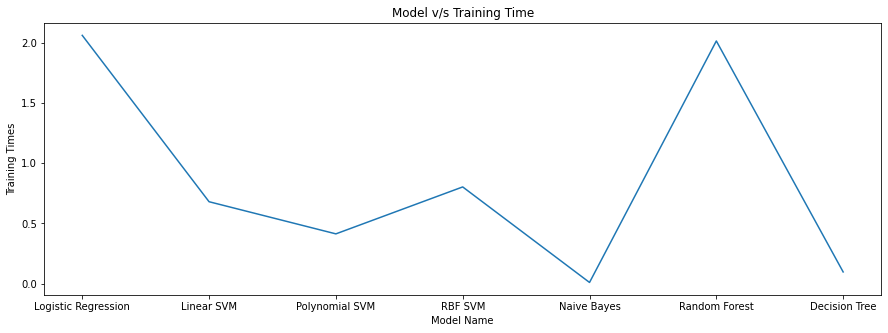

In [ ]:
# Model vs Training Times
figure = plt.figure(figsize=(15,5))
plt.xlabel('Model Name')
plt.ylabel('Training Times')
plt.title('Model v/s Training Time')
plt.plot(models,trainTimes)
plt.show()

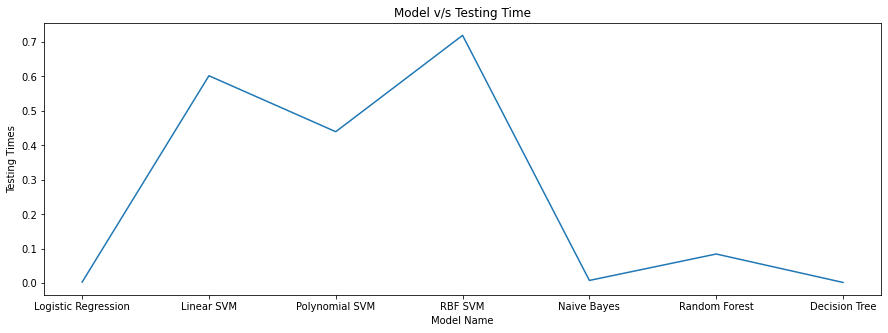

In [ ]:
# Model vs Test Times
figure = plt.figure(figsize=(15,5))
plt.xlabel('Model Name')
plt.ylabel('Testing Times')
plt.title('Model v/s Testing Time')
plt.plot(models,testTimes)
plt.show()

# Building a stacking model

**Since Polynomial SVM, Random Forest and Decision Trees are the best performing classifiers, I train stacked models using permutations of these classifiers, with the final classifer being Logistic Regression.**

Training a Random Forest, Decision Tree -> Naive Bayes Stacked model.

Random Forest, Decision Tree -> Naive Bayes Stacked model trained. Time taken for training is: 11.77927279472351 seconds.

Random Forest, Decision Tree -> Naive Bayes Stacked model has been tested on the test data.
Accuracy of this model is: 0.660813704496788
Time taken for testing is 0.09056997299194336 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      0.99      0.99        91
           3       0.81      0.02      0.04       722
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       0.64      0.94      0.76        31
           7       1.00      1.00      1.00        34
           8       0.82      0.97      0.89        68
           9       1.00      1.00      1.00       211
          10       1.00      0.98   

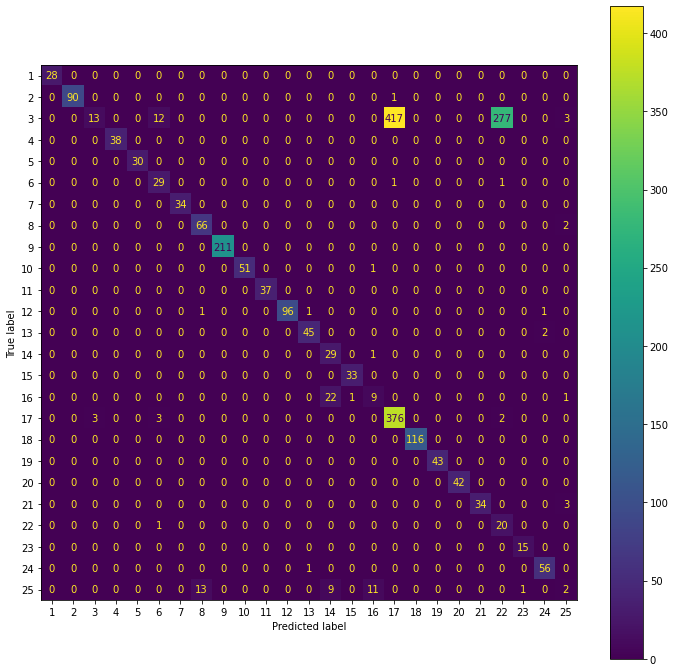

(0.660813704496788, 11.77927279472351, 0.09056997299194336)

In [ ]:
from sklearn.ensemble import StackingClassifier

# Create Base Learners
base_learners = [
                 ('rf_1', RandomForestClassifier()),
                 ('dt_1', DecisionTreeClassifier())
                ]

# Initialize Stacking Classifier with the Meta Learner
model = StackingClassifier(estimators=base_learners, final_estimator=GaussianNB())

trainModel(model, 'Random Forest, Decision Tree -> Naive Bayes Stacked', XTrain, XTest, YTrain, YTest)

Training a Random Forest, Decision Tree -> Logistic Regression Stacked model.

Random Forest, Decision Tree -> Logistic Regression Stacked model trained. Time taken for training is: 13.79110312461853 seconds.

Random Forest, Decision Tree -> Logistic Regression Stacked model has been tested on the test data.
Accuracy of this model is: 0.9220556745182013
Time taken for testing is 0.10293459892272949 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      0.99      0.99        91
           3       0.89      0.92      0.91       722
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       0.97      0.94      0.95        31
           7       1.00      1.00      1.00        34
           8       0.95      0.91      0.93        68
           9       1.00      1.00      1.00       211
          1

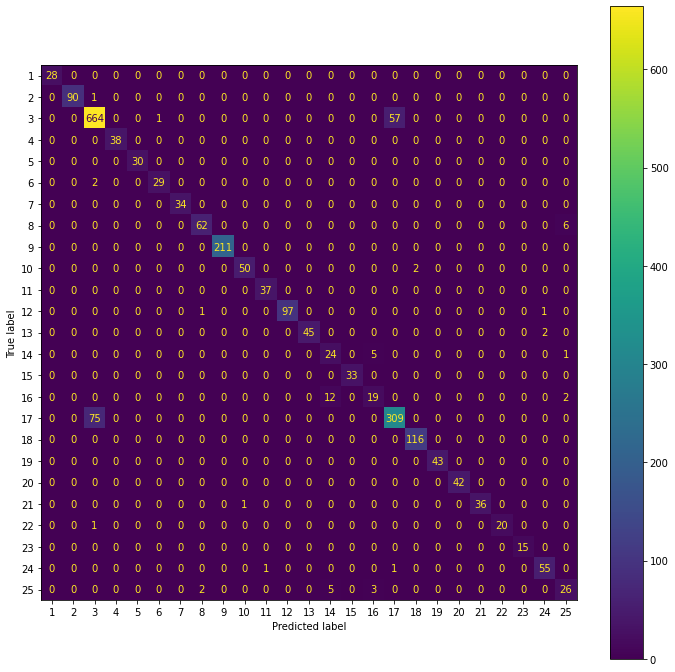

(0.9220556745182013, 13.79110312461853, 0.10293459892272949)

In [ ]:
# Create Base Learners
base_learners = [
                 ('rf_1', RandomForestClassifier()),
                 ('dt_1', DecisionTreeClassifier())
                ]

# Initialize Stacking Classifier with the Meta Learner
model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# clf.fit(X_train, y_train).score(X_test, y_test)
trainModel(model, 'Random Forest, Decision Tree -> Logistic Regression Stacked', XTrain, XTest, YTrain, YTest)

Training a Random Forest, Polynomial SVM -> Logistic Regression Stacked model.

Random Forest, Polynomial SVM -> Logistic Regression Stacked model trained. Time taken for training is: 77.77396631240845 seconds.

Random Forest, Polynomial SVM -> Logistic Regression Stacked model has been tested on the test data.
Accuracy of this model is: 0.9254817987152034
Time taken for testing is 0.603562593460083 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      0.99      0.99        91
           3       0.91      0.92      0.91       722
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       0.94      0.97      0.95        31
           7       1.00      1.00      1.00        34
           8       0.92      0.87      0.89        68
           9       1.00      1.00      1.00       211
          

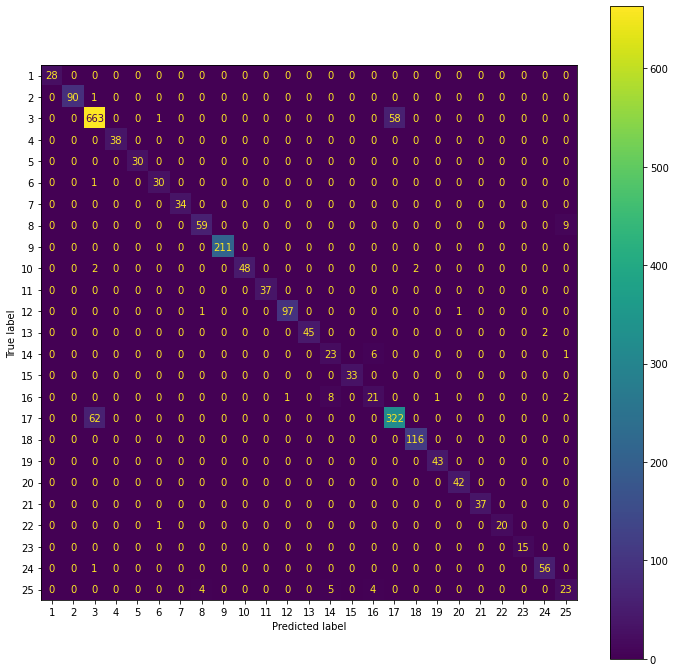

(0.9254817987152034, 77.77396631240845, 0.603562593460083)

In [ ]:
# Create Base Learners
base_learners = [
                 ('rf_1', RandomForestClassifier()),
                 ('svc_1', SVC(kernel = 'poly', degree = 3, C=7))
                ]

model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(max_iter=10000))

trainModel(model, 'Random Forest, Polynomial SVM -> Logistic Regression Stacked', XTrain, XTest, YTrain, YTest)

Training a Decision Tree, Polynomial SVM -> Logistic Regression Stacked model.

Decision Tree, Polynomial SVM -> Logistic Regression Stacked model trained. Time taken for training is: 75.91892075538635 seconds.

Decision Tree, Polynomial SVM -> Logistic Regression Stacked model has been tested on the test data.
Accuracy of this model is: 0.8903640256959314
Time taken for testing is 0.5398588180541992 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      0.99      0.99        91
           3       0.86      0.86      0.86       722
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       0.94      0.94      0.94        31
           7       1.00      1.00      1.00        34
           8       0.90      0.88      0.89        68
           9       1.00      1.00      1.00       211
         

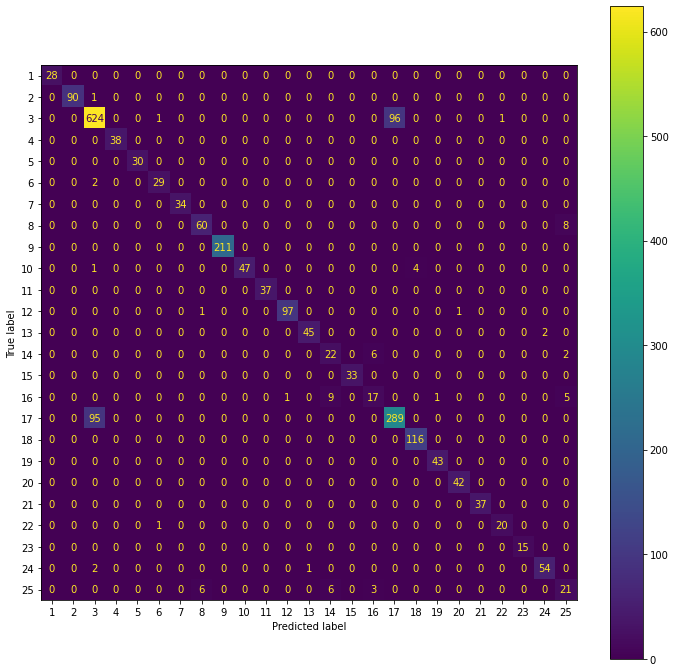

(0.8903640256959314, 75.91892075538635, 0.5398588180541992)

In [ ]:
# Create Base Learners
base_learners = [
                 ('dt_1', DecisionTreeClassifier()),
                 ('svc_1', SVC(kernel = 'poly', degree = 3, C=7))
                ]

model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(max_iter=10000))

trainModel(model, 'Decision Tree, Polynomial SVM -> Logistic Regression Stacked', XTrain, XTest, YTrain, YTest)

Training a Random Forest, Decision Tree -> Decision Tree, Polynomial SVM -> Logistic Regression Stacked model.



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Random Forest, Decision Tree -> Decision Tree, Polynomial SVM -> Logistic Regression Stacked model trained. Time taken for training is: 254.28104305267334 seconds.

Random Forest, Decision Tree -> Decision Tree, Polynomial SVM -> Logistic Regression Stacked model has been tested on the test data.
Accuracy of this model is: 0.8967880085653105
Time taken for testing is 0.4294545650482178 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      0.99      0.99        91
           3       0.93      0.82      0.87       722
           4       1.00      0.95      0.97        38
           5       1.00      1.00      1.00        30
           6       0.93      0.90      0.92        31
           7       1.00      1.00      1.00        34
           8       0.90      0.91      0.91        68
           9       1.00      1.00      1.00       211
          10       1.00 

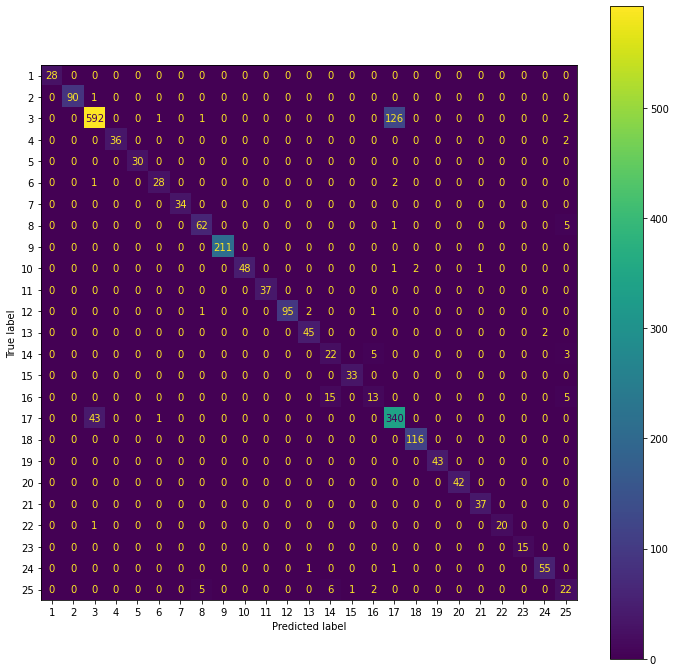

(0.8967880085653105, 254.28104305267334, 0.4294545650482178)

In [ ]:
# Create Learners per layer
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier()),
                        ('dt_1', DecisionTreeClassifier())
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('svc_1', SVC(kernel = 'poly', degree = 3, C=7)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression(max_iter=10000))

# Create Final model by 
model = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

trainModel(model, 'Random Forest, Decision Tree -> Decision Tree, Polynomial SVM -> Logistic Regression Stacked', XTrain, XTest, YTrain, YTest)

Training a Random Forest, Decision Tree -> Decision Tree, Random Forest -> Logistic Regression Stacked model.

Random Forest, Decision Tree -> Decision Tree, Random Forest -> Logistic Regression Stacked model trained. Time taken for training is: 18.59256649017334 seconds.

Random Forest, Decision Tree -> Decision Tree, Random Forest -> Logistic Regression Stacked model has been tested on the test data.
Accuracy of this model is: 0.9169164882226981
Time taken for testing is 0.17881393432617188 seconds.

Classification Report of the Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      0.99      0.99        91
           3       0.89      0.91      0.90       722
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       0.97      0.94      0.95        31
           7       1.00      1.00      1.00        34
           8       0.97

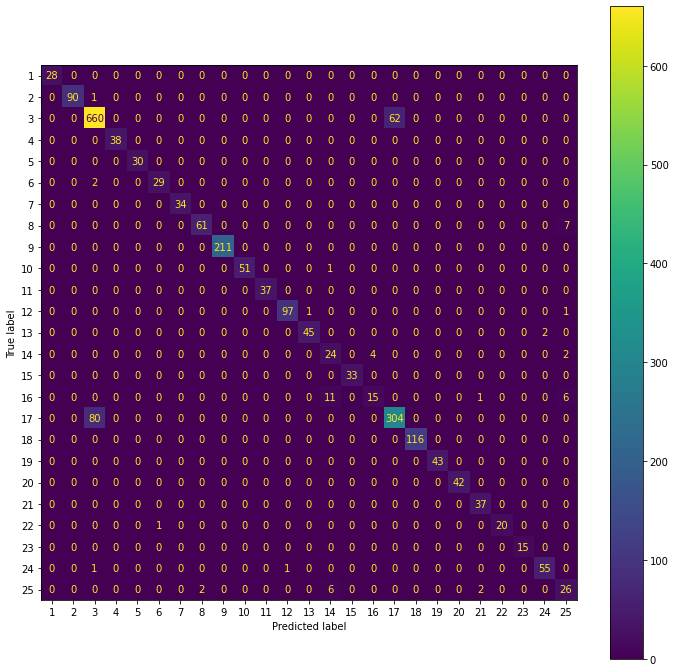

(0.9169164882226981, 18.59256649017334, 0.17881393432617188)

In [ ]:
# Create Learners per layer
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier()),
                        ('dt_1', DecisionTreeClassifier())
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier()),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# Create Final model by 
model = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

trainModel(model, 'Random Forest, Decision Tree -> Decision Tree, Random Forest -> Logistic Regression Stacked', XTrain, XTest, YTrain, YTest)